# PoDS Car Advert Project

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(
    { "figure.figsize": (8, 6) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))

import warnings
warnings.filterwarnings('ignore')

### Importing and familiriasing with the Dataset

In [3]:
# load the dataset adverts.csv
ads = pd.read_csv('adverts.csv')

In [4]:
# Return the top 10 columns to familiarise with the dataframe(or 5 without argument)
ads.head(20)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
6,202007080998445,24075.0,17,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
7,202009244143980,99000.0,13,Bronze,Land Rover,Range Rover,USED,2013.0,24475,SUV,False,Diesel
8,202010014442611,111236.0,08,Black,Mercedes-Benz,S Class,USED,2008.0,6995,Limousine,False,Diesel
9,202006230431327,9500.0,19,White,Land Rover,Range Rover,USED,2019.0,79995,SUV,False,Diesel


In [5]:
# Finding the zero mileage and null values and their error with new/used classification
zero_mileage = ads[(ads['mileage'] == 0)]
zero_mileage_used = ads[(ads['mileage'] == 0) & (ads['vehicle_condition'] == 'USED')]
null_mileage = ads['mileage'].isna()
len(zero_mileage), len(zero_mileage_used), null_mileage.sum()

(16207, 355, np.int64(127))

In [6]:
# Show unique values from fuel_type and count their occurences
ads['fuel_type'].unique

<bound method Series.unique of 0         Petrol Plug-in Hybrid
1                        Diesel
2                        Petrol
3                        Diesel
4                        Diesel
                  ...          
402000                   Petrol
402001                   Petrol
402002                   Petrol
402003                   Petrol
402004                   Diesel
Name: fuel_type, Length: 402005, dtype: object>

In [7]:
# Selecting 20 random rows from the dataset
bi_fuel = ads[ads['fuel_type'] == 'Bi Fuel']
bi_fuel.sample(20)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
113013,202009013169536,2500.0,20,White,Dacia,Duster,USED,2020.0,15495,SUV,False,Bi Fuel
306546,202009133668069,0.0,NaN,White,Dacia,Duster,NEW,NaN,15345,SUV,False,Bi Fuel
285470,202009304403776,0.0,NaN,Black,Dacia,Duster,NEW,NaN,15421,SUV,False,Bi Fuel
378477,202009203975703,0.0,NaN,Black,Dacia,Sandero Stepway,NEW,NaN,12505,Hatchback,False,Bi Fuel
357603,202010155037735,0.0,NaN,Grey,Dacia,Sandero,NEW,NaN,9705,Hatchback,False,Bi Fuel
156306,202010165071064,110000.0,08,Silver,Subaru,Forester,USED,2008.0,4495,SUV,False,Bi Fuel
317092,202009183885043,0.0,NaN,Grey,Dacia,Duster,NEW,NaN,13755,SUV,False,Bi Fuel
30713,202009304403851,0.0,NaN,Grey,Dacia,Duster,NEW,NaN,15905,SUV,False,Bi Fuel
43939,202006150139342,0.0,NaN,Grey,Dacia,Duster,NEW,NaN,14000,SUV,False,Bi Fuel
140588,202009234094516,25.0,70,Grey,Dacia,Sandero,USED,2020.0,9995,Hatchback,False,Bi Fuel


In [8]:
# Return the full overview of the dataframe including column names, counts, non-nulls, and data types
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [9]:
# Use shape attribute to see the shape of the dataframe(wide/long)
ads.shape

(402005, 12)

In [10]:
# Return the statistical summary of the numerical attributes
ads.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [11]:
# Return the last 10 rows from the dataset
ads.tail(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
401995,202010305624221,53460.0,10,Blue,SEAT,Ibiza,USED,2010.0,3795,Estate,False,Petrol
401996,202010315639231,45000.0,15,Silver,Vauxhall,Corsa,USED,2015.0,5000,Hatchback,False,Petrol
401997,202010315647416,4075.0,69,Grey,Nissan,Juke,USED,2019.0,18000,SUV,False,Petrol
401998,202010315649743,87078.0,53,Green,Honda,Jazz,USED,2003.0,995,Hatchback,False,Petrol
401999,202010315651841,74732.0,59,Blue,Toyota,Auris,USED,2009.0,2600,Hatchback,False,Petrol
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [12]:
# Subsetting the dataset to rows with reg_code and empty year_of_registrations
# null_reg = ads.loc[(ads['reg_code'].notnull()) & (ads['year_of_registration']).isnull]
# Return 10 random samples from the subset dataframe above
# null_reg.sample(10)

## Data Pre-Processing

In [13]:
# Looking at the null value
ads.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

### Missing Milage

In [14]:
# Subsetting rows with missing milage values
no_mileage = ads[ads['mileage'].isnull()]
no_mileage.sample(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
217427,202010074713560,NaN,70,NaN,Mercedes-Benz,V Class,USED,2020.0,94995,MPV,True,Diesel
370192,202009063378392,NaN,11,Blue,Honda,Civic,USED,2011.0,3499,Hatchback,False,Petrol
235206,202010175100968,NaN,07,Grey,SEAT,Altea,USED,2007.0,1495,MPV,False,Diesel
391833,202010074725979,NaN,67,Grey,Audi,A7,USED,2017.0,28590,Hatchback,False,Diesel
115218,202010094786923,NaN,68,Orange,Dacia,Duster,USED,2018.0,11999,SUV,False,Petrol
185474,202010165098929,NaN,08,Silver,SKODA,Octavia,USED,2008.0,2195,Estate,False,Diesel
303338,202010235340310,NaN,17,White,Vauxhall,Insignia,USED,2017.0,11499,Hatchback,False,Diesel
73518,202010144976926,NaN,18,White,Hyundai,Tucson,USED,2018.0,14397,SUV,False,Petrol
96606,202010074717457,NaN,70,White,Suzuki,Ignis,USED,2020.0,10990,Hatchback,False,Petrol Hybrid
298096,202007030809519,NaN,65,Grey,Vauxhall,Insignia,USED,2015.0,8499,Estate,False,Diesel


In [15]:
# Filling missing mileage values with average from the average mileage of cars with the same year of registration
ads['mileage'] = ads['mileage'].fillna(
    ads.groupby('year_of_registration')['mileage'].transform('mean')
)
no_mileage.sample(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
335042,202010134940459,NaN,67,Blue,Mitsubishi,ASX,USED,2017.0,15490,SUV,False,Diesel
185686,202009234102822,NaN,17,Black,Volvo,V40,USED,2017.0,10999,Hatchback,False,Petrol
295240,202010064654536,NaN,13,Red,Mitsubishi,ASX,USED,2013.0,8990,SUV,False,Diesel
258133,202010295587413,NaN,67,Grey,Alfa Romeo,Giulia,USED,2017.0,39995,Saloon,False,Petrol
111122,202010225288019,NaN,70,Black,Dacia,Duster,USED,2020.0,15999,SUV,False,Diesel
290854,202010195178612,NaN,64,White,Kia,Rio,USED,2014.0,7495,Hatchback,False,Petrol
136360,202001316783622,NaN,70,Grey,Fiat,500,USED,2020.0,11795,Hatchback,False,Petrol
115218,202010094786923,NaN,68,Orange,Dacia,Duster,USED,2018.0,11999,SUV,False,Petrol
298732,201907150103328,NaN,G,Purple,Vauxhall,Astra,USED,NaN,4999,Convertible,False,Petrol
124064,202010295574002,NaN,55,Red,Chevrolet,Matiz,USED,2006.0,1495,Hatchback,False,Petrol


In [16]:
# Using .dropna() to delete 19 rows with null mileage

ads = ads.dropna(subset = ['mileage'])

In [17]:
ads.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31845
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33292
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

### Missing Year Of Registration

In [18]:
# Subsetting rows where year_of_registration is null and reg_code is not null
registration_and_null_year = ads[ads['reg_code'].isnull() & ads['year_of_registration'].notnull()]
registration_and_null_year.head()
# There are 287 rows with missing year but has registration code

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
630,202010275479166,54000.0,NaN,White,Toyota,Prius+,USED,2019.0,10900,MPV,False,Petrol Hybrid
682,202006019703585,103450.0,NaN,Bronze,BMW,3 Series,USED,2006.0,6000,Convertible,False,Petrol
1131,202009274274693,74000.0,NaN,Silver,Mercedes-Benz,SL Class,USED,2004.0,15950,Convertible,False,Petrol
1194,202010114878094,13000.0,NaN,White,Ferrari,599,USED,2017.0,79949,Coupe,False,Petrol
1335,202004018824812,76000.0,NaN,White,Aston Martin,DB4,USED,2018.0,495000,Saloon,False,Petrol


In [19]:
# First we need to identify the registration code unique values

unique_reg = ads['reg_code'].unique()
unique_reg

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [20]:
# Fill year_of_reg based on year on reg_code

# Define the letter to year dictionary
letter_to_year = {
    'A': 1983, 'B': 1984, 'C': 1985, 'D': 1986, 'E': 1987, 'F': 1988,
    'G': 1989, 'H': 1990, 'J': 1991, 'K': 1992, 'L': 1993, 'M': 1994,
    'N': 1995, 'P': 1996, 'R': 1997, 'S': 1998, 'T': 1999, 'V': 1999,
    'W': 2000, 'X': 2000, 'Y': 2001
}

# Converting lowercase to uppercase on reg_code
ads['reg_upper'] = ads['reg_code'].astype(str).str.upper().str.strip()

# Converting letter to year
mapped_years = ads['reg_upper'].map(letter_to_year)

# Filling the missing values on year_of_registration
ads['year_of_registration'] =ads['year_of_registration'].fillna(mapped_years)

# Dropping the temporary column for this task
ads.drop(columns=['reg_upper'], inplace=True)

In [21]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401986 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401986 non-null  int64  
 1   mileage                401986 non-null  float64
 2   reg_code               370141 non-null  object 
 3   standard_colour        396608 non-null  object 
 4   standard_make          401986 non-null  object 
 5   standard_model         401986 non-null  object 
 6   vehicle_condition      401986 non-null  object 
 7   year_of_registration   368740 non-null  float64
 8   price                  401986 non-null  int64  
 9   body_type              401149 non-null  object 
 10  crossover_car_and_van  401986 non-null  bool   
 11  fuel_type              401385 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


In [22]:
# Replacing the missing year with numeric reg_code

# Define the function to convert numeric code to year
def numeric_code_to_year(code):
    if pd.isna(code):
        return None
    try:
        #converting possible wrong data type
        val = int(str(code).strip())
    except ValueError:
        return None
    #ignoring non-sensical number (eg. 94, 95)
    if val > 70:
        return None
    if val >=50:
        return 2000 + (val-50)
    elif val >= 2:
        return 2000 + val
    return None

# APPLYING THE FUNCTIOn

num_years = ads['reg_code'].apply(numeric_code_to_year)

ads['year_of_registration'] = ads['year_of_registration'].fillna(num_years)

ads[['reg_code', 'year_of_registration']].head()

,reg_code,year_of_registration
0,NaN,NaN
1,61,2011.0
2,17,2017.0
3,16,2016.0
4,64,2015.0


In [23]:
ads.info()
ads.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 401986 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401986 non-null  int64  
 1   mileage                401986 non-null  float64
 2   reg_code               370141 non-null  object 
 3   standard_colour        396608 non-null  object 
 4   standard_make          401986 non-null  object 
 5   standard_model         401986 non-null  object 
 6   vehicle_condition      401986 non-null  object 
 7   year_of_registration   370421 non-null  float64
 8   price                  401986 non-null  int64  
 9   body_type              401149 non-null  object 
 10  crossover_car_and_van  401986 non-null  bool   
 11  fuel_type              401385 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


public_reference             0
mileage                      0
reg_code                 31845
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     31565
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [24]:
# Replacing missing values of the year of registration by using the median from the group of other rows with the same milage, standard_model, and price

19

19

In [25]:
((ads['reg_code'].isna()) & (ads['year_of_registration'].isna())).sum

<bound method Series.sum of 0          True
1         False
2         False
3         False
4         False
          ...  
402000    False
402001    False
402002    False
402003    False
402004    False
Length: 401986, dtype: bool>

In [26]:
# For rows with both missing year_of_registration and reg_code
# We can use the median price and standard model bins to place a best estimation

# Adding new feature price band by their standard_model
ads['price_level'] = ads.groupby('standard_model')['price'].transform(
    lambda x: pd.qcut(x, 5, labels=False, duplicates='drop')
)

years_price = ads.groupby(['standard_model', 'price_level'])['year_of_registration'].transform('median')

# filling the missing year values with the information set up above
ads['year_of_registration'] = ads['year_of_registration'].fillna(years_price)

# Drop the temporary column for this task
ads.drop(columns=['price_level'], inplace=True)

In [27]:
ads.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31845
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration       575
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [28]:
# We can delete the remaining rows with missing year_of_registration
# Assign a subset of rows with missing year_of_registration for later use
no_year = ads[ads['year_of_registration'].isna()]

ads = ads.dropna(subset = 'year_of_registration')

In [29]:
# Filling missing registration code from the available year of registration



### Missing Body Type

In [30]:
# We can fill missing body_type from getting mode of body_type from rows with the same standard_model and standard_make

# Getting mode from the grouped rows
mode_by_modelmake = ads.groupby(['standard_model', 'standard_make'])['body_type'].transform(
    lambda x: x.mode()[0] if not x.mode().empty else "Unknown"
)

# Applying the mode to the rows with missing body_type
ads['body_type'] = ads['body_type'].fillna(mode_by_modelmake)

### Missing Fuel Type

In [31]:
# Using SimpleImputer to fill in rows with missing fuel_type

from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(strategy='most_frequent')
ads['fuel_type'] = imp_mode.fit_transform(ads[['fuel_type']]).ravel()

In [32]:
ads.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31270
standard_colour           5349
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

### Missing Registration

The information shown on the registration code(reg_code) column is only part of vehicle registration that indicate the year that the vehicle is registered. This information is useful to fill missing valus for year_of_registration. We can drop this column because there is not much analysis we can do with this feature.

In [33]:
ads = ads.drop('reg_code', axis=1)

In [34]:
ads.isnull().sum()

public_reference            0
mileage                     0
standard_colour          5349
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                   0
crossover_car_and_van       0
fuel_type                   0
dtype: int64

## Dealing with Outliers

### Identifying and Dealing with Outliers in Mileage

<Axes: ylabel='mileage'>

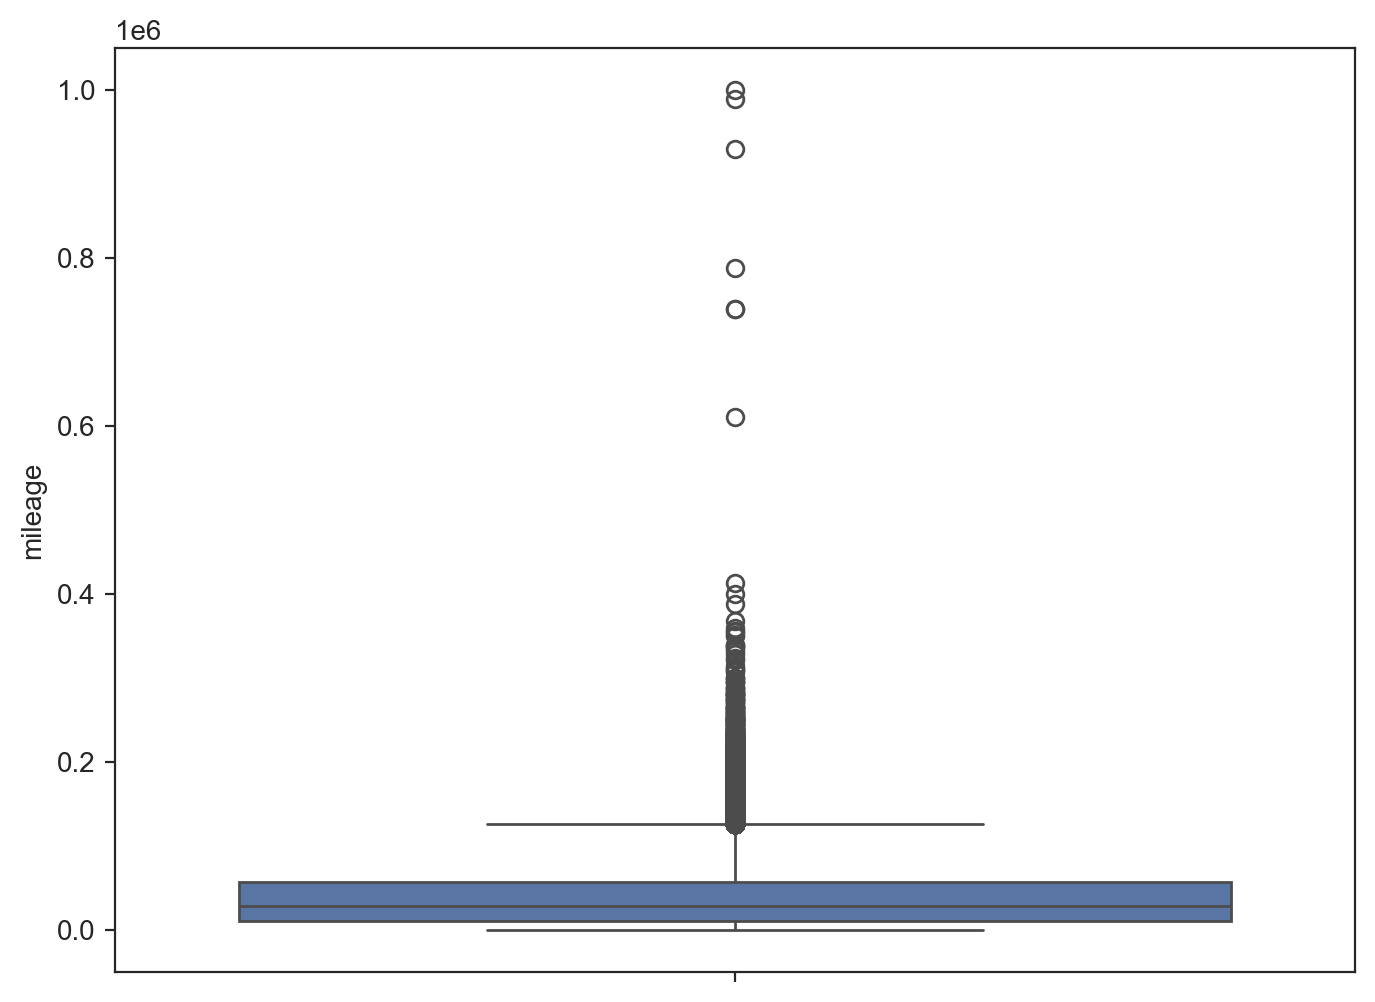

In [39]:
# Plotting mileage data to identify outliers

sns.boxplot(ads['mileage'])

In [42]:
# Subsetting mileage above 500000

mileage_over500000 = ads[ads['mileage'] > 500000]
ads['mileage'].describe()

count    401411.000000
mean      37796.564893
std       34826.676135
min           0.000000
25%       10538.000000
50%       28711.000000
75%       56989.500000
max      999999.000000
Name: mileage, dtype: float64

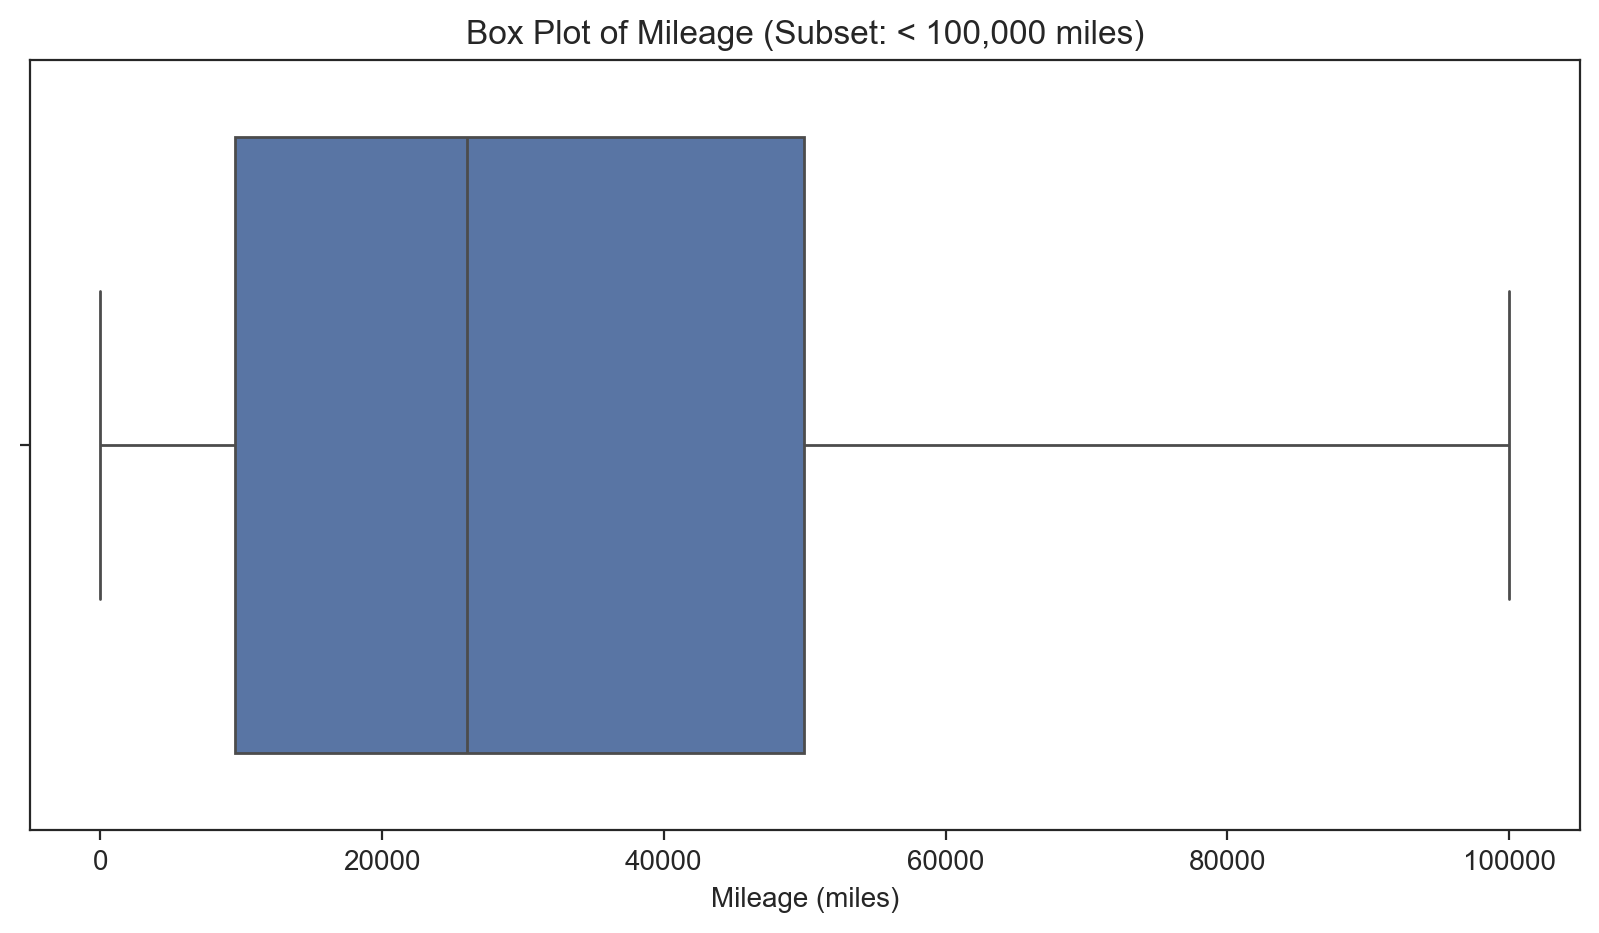

In [60]:
under_100000 = ads[ads['mileage']<100000]
plt.figure(figsize=(10,5))
sns.boxplot(x=under_100000['mileage'])
plt.title('Box Plot of Mileage (Subset: < 100,000 miles)')
plt.xlabel('Mileage (miles)')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 394173 entries, 0 to 402004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       394173 non-null  int64  
 1   mileage                394173 non-null  float64
 2   standard_colour        388962 non-null  object 
 3   standard_make          394173 non-null  object 
 4   standard_model         394173 non-null  object 
 5   vehicle_condition      394173 non-null  object 
 6   year_of_registration   394173 non-null  float64
 7   price                  394173 non-null  int64  
 8   body_type              394173 non-null  object 
 9   crossover_car_and_van  394173 non-null  bool   
 10  fuel_type              394173 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 33.5+ MB


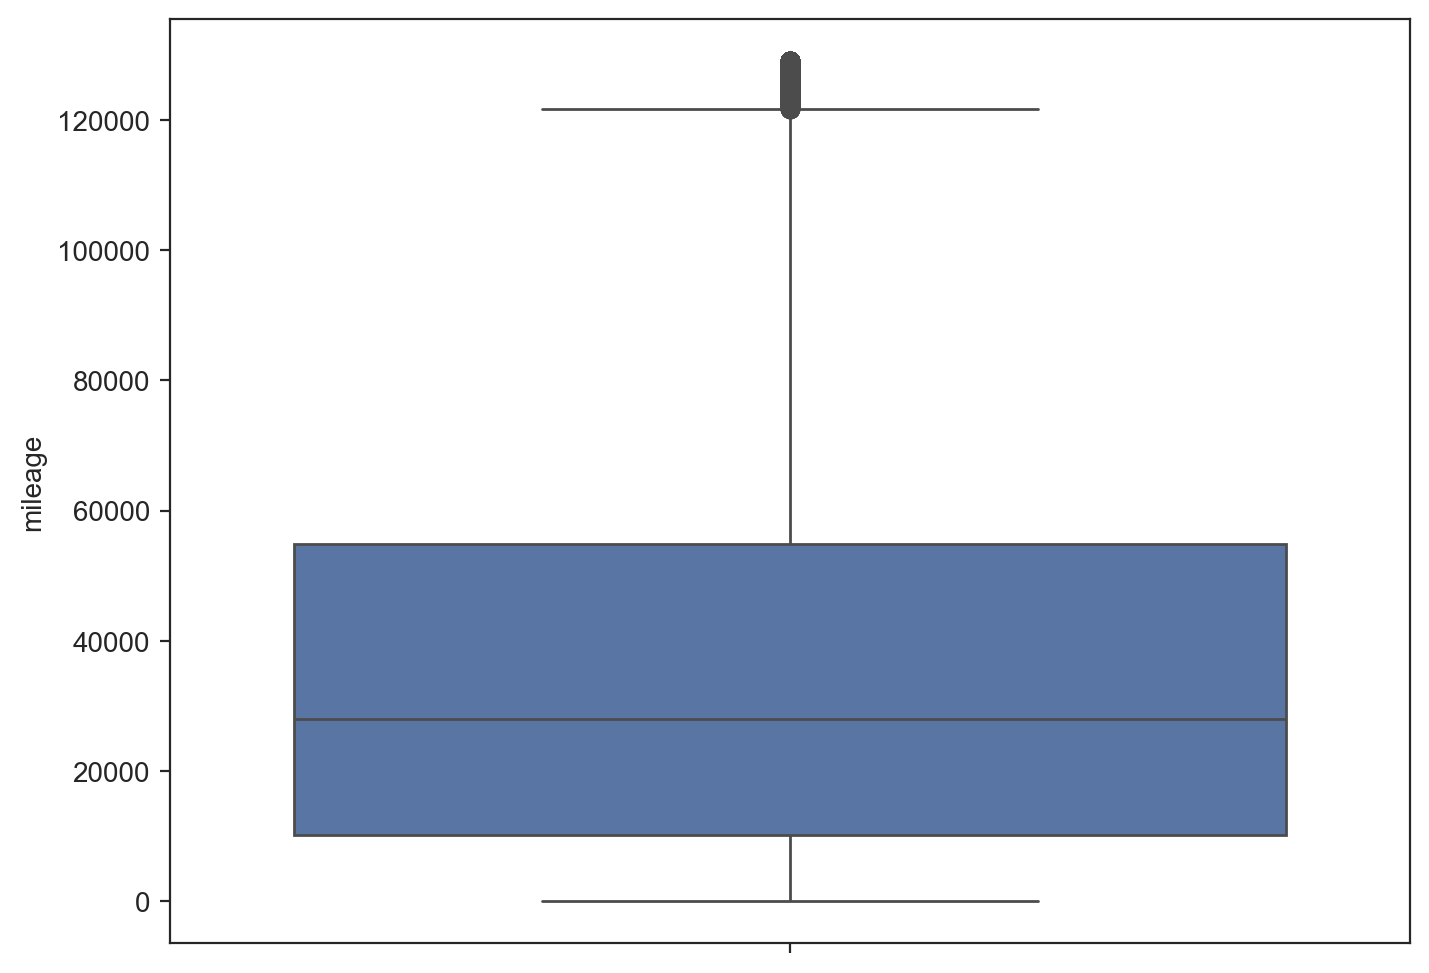

In [72]:
# Using Z-score to find the outlier and elimiate

# Getting the mileage z-score for each rows
mileage_zscore = (ads['mileage'] - ads['mileage'].mean())/ads['mileage'].std(ddof=0)
# Applying the threshold
zscore_plusmin3 = (mileage_zscore > -3) & (mileage_zscore < 3)
# Applying to the dataset
ads_cleaned = ads[zscore_plusmin3]

ads = ads_cleaned

sns.boxplot(ads['mileage'])
ads.info()

### Dealing with Price Ouliers

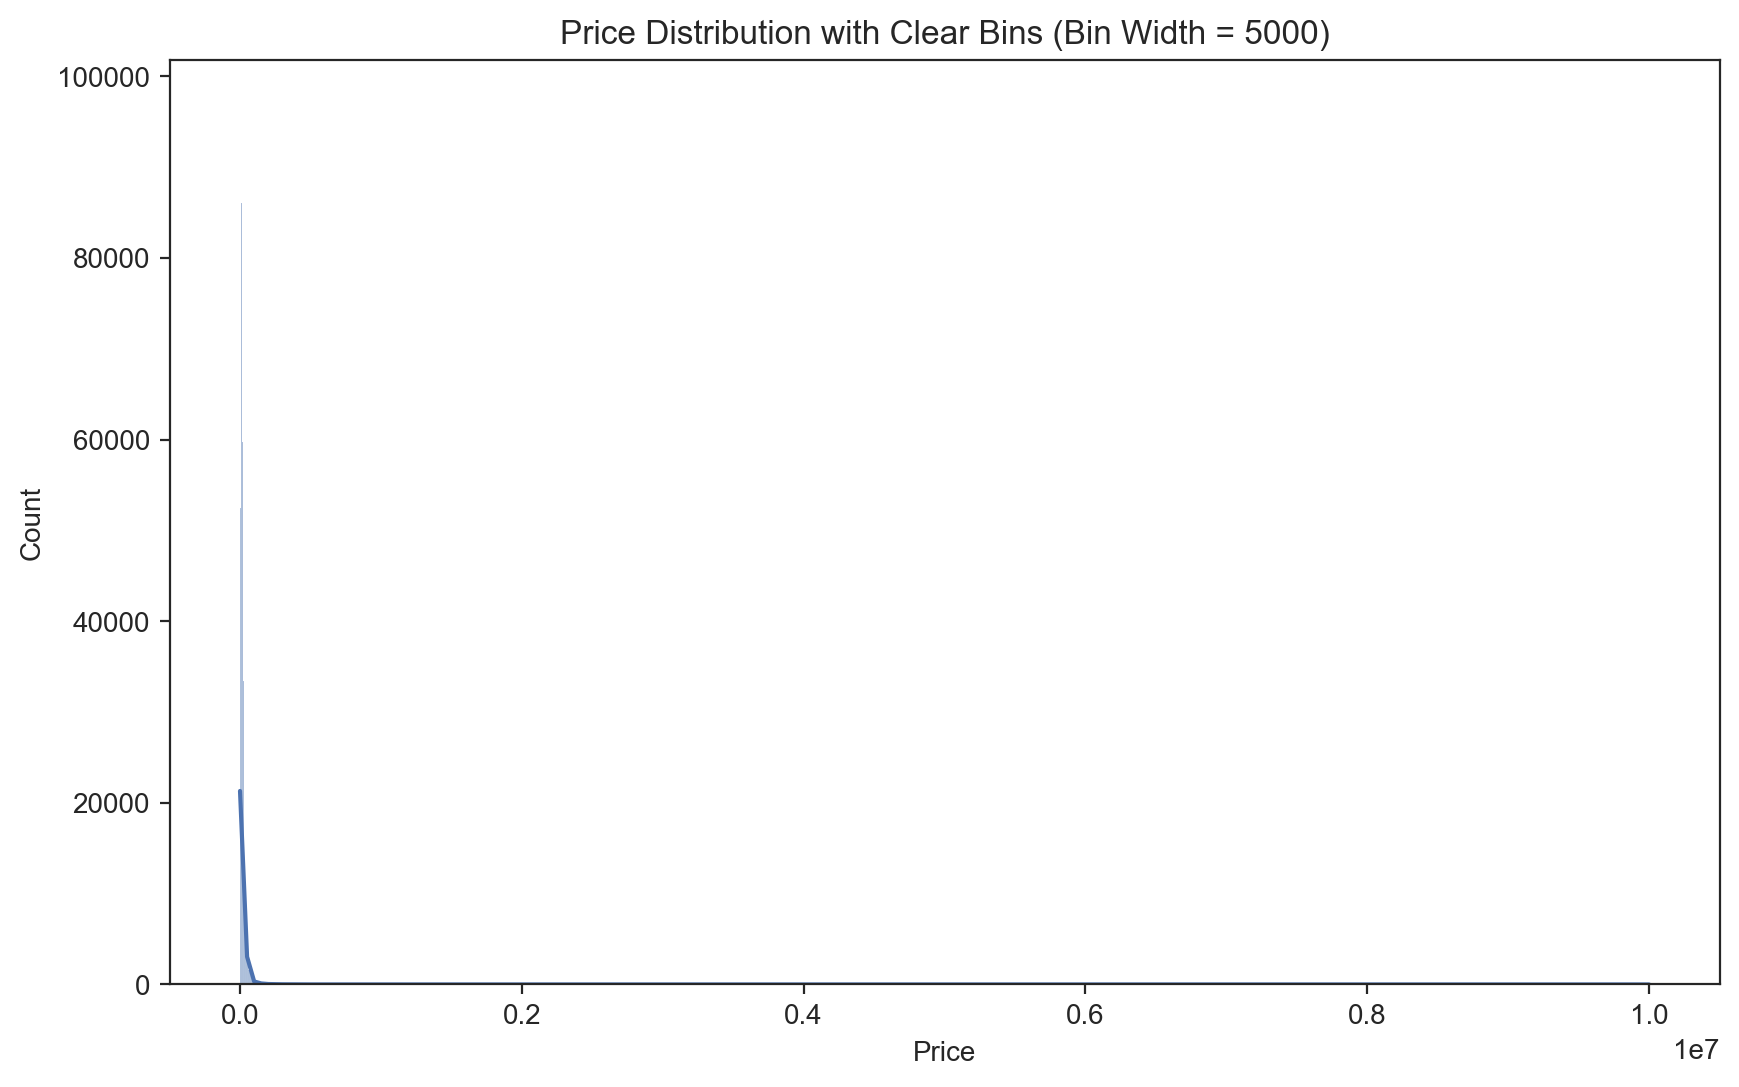

In [86]:
# Plotting the price to see any outliers

BIN_WIDTH = 5000

plt.figure(figsize=(10, 6))
# Use binwidth to define clear, non-overlapping bins
sns.histplot(data=ads, x='price', binwidth=BIN_WIDTH, kde=True)

plt.title(f'Price Distribution with Clear Bins (Bin Width = {BIN_WIDTH})')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [89]:
# Using Z-score to find the outlier and elimiate

# Getting the mileage z-score for each rows
price_zscore = (ads['price'] - ads['price'].mean())/ads['price'].std(ddof=0)
# Applying the threshold
zscore_plusmin3 = (price_zscore > -3) & (price_zscore < 3)
# Applying to the dataset
ads_cleaned = ads[zscore_plusmin3]

ads = ads_cleaned

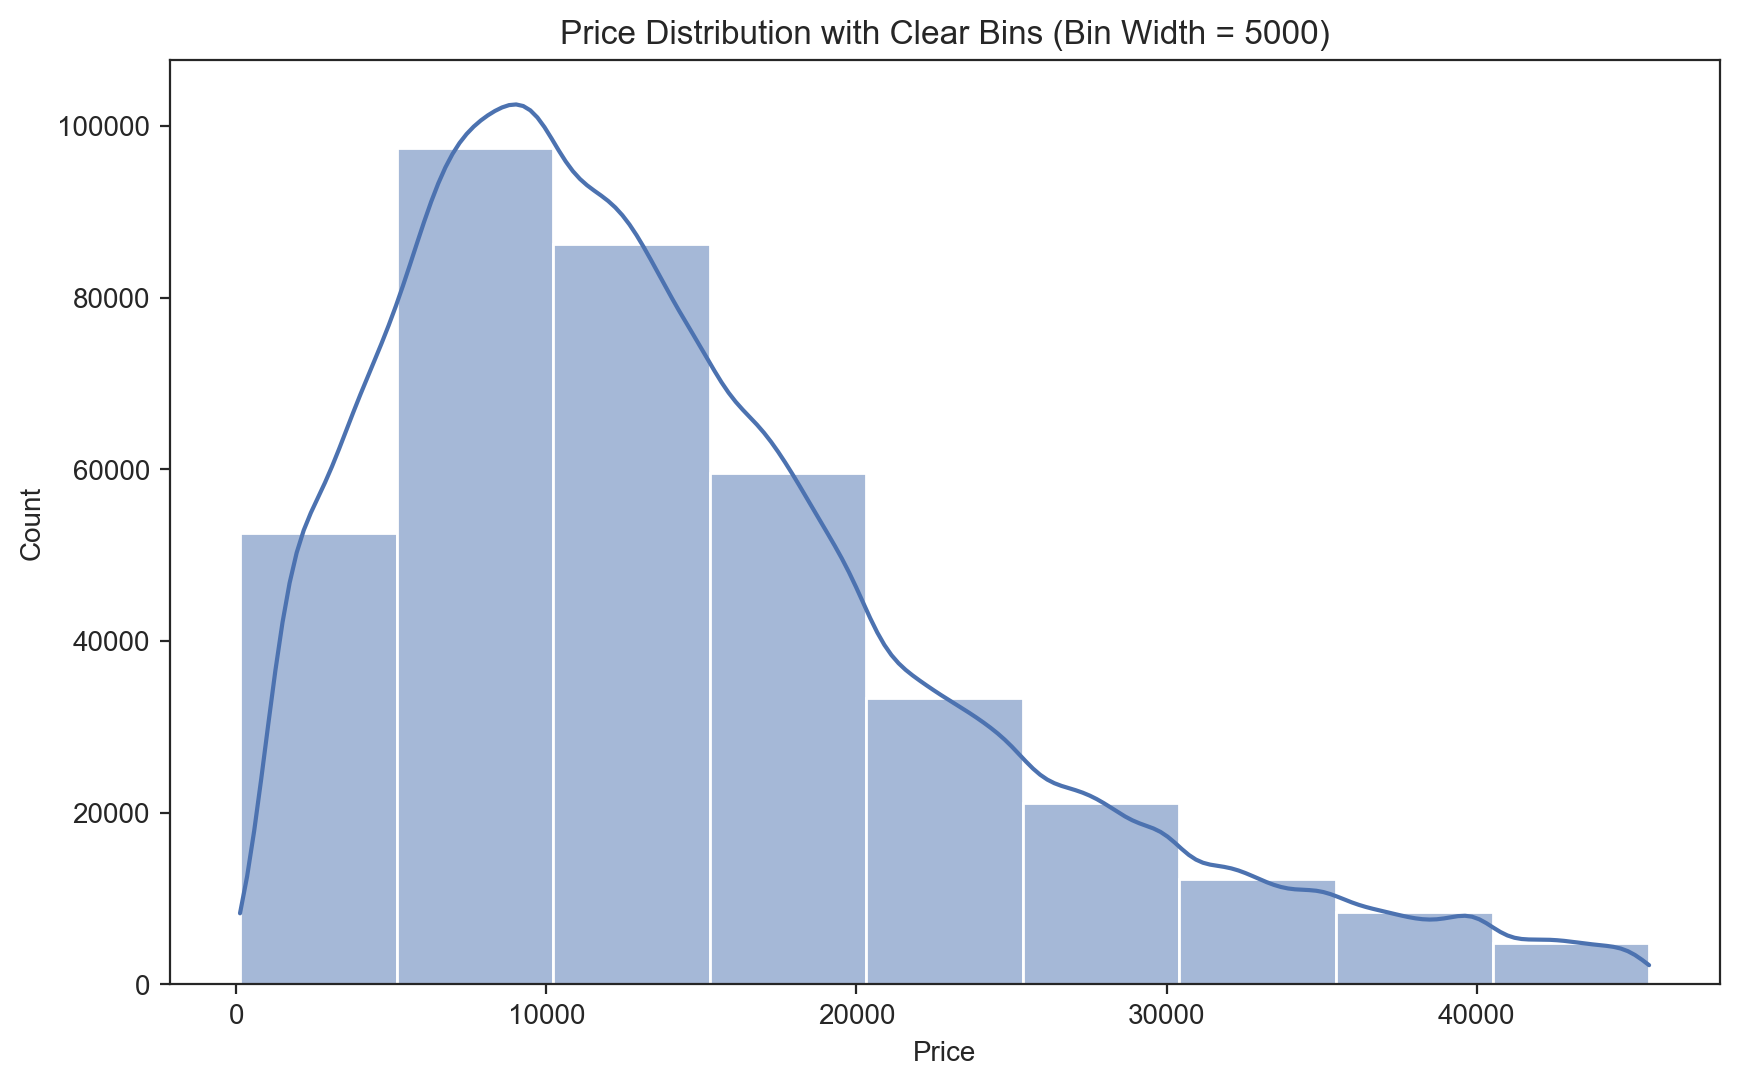

In [93]:
bin_widht = 5000

plt.figure(figsize=(10, 6))
# Use binwidth to define clear, non-overlapping bins
sns.histplot(data=ads, x='price', binwidth=bin_widht, kde=True)

plt.title(f'Price Distribution with Clear Bins (Bin Width = {bin_widht})')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [ ]:
# Treating rows with zero price as missing values



# Exploratory Data Analysis

### Fuel Type

In [75]:
# Checking what are the fuel types available in this dataset
ads['fuel_type'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', 'Bi Fuel'],
      dtype=object)

In [80]:
# Creating new feature called energy_type
conditions = [
    (ads['fuel_type'].isin(['Diesel', 'Petrol', 'Bi Fuel'])),
    (ads['fuel_type'].isin(['Petrol Plug-in Hybrid', 'Diesel Hybrid', 'Petrol Hybrid', 'Electric']))
]

choices = ['Fossil', 'Hybrid/Electric']

ads['energy_type'] = np.select(conditions, choices, default='Other')
ads.sample(10)

,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,energy_type
344324,202009063376334,20268.0,NaN,Nissan,Pulsar,USED,2017.0,8495,Hatchback,False,Diesel,Fossil
159891,202010215256867,54000.0,Black,Porsche,Cayenne,USED,2014.0,30990,SUV,False,Diesel,Fossil
262862,202009244172898,84000.0,Grey,Vauxhall,Zafira,USED,2009.0,1895,MPV,False,Petrol,Fossil
111565,202008162554661,27071.0,Blue,Nissan,Micra,USED,2017.0,8999,Hatchback,False,Petrol,Fossil
388507,202009304378349,28747.0,Black,Audi,TT,USED,2017.0,18000,Coupe,False,Petrol,Fossil
379388,202007221554857,31852.0,Blue,Volvo,V40,USED,2016.0,9500,Hatchback,False,Diesel,Fossil
4934,202010024522646,92000.0,Blue,BMW,1 Series,USED,2005.0,2995,Hatchback,False,Diesel,Fossil
92205,202009103564618,15471.0,White,Nissan,Juke,USED,2017.0,12790,SUV,False,Petrol,Fossil
356460,202009113590259,89000.0,Yellow,Renault,Clio,USED,2007.0,7200,Hatchback,False,Petrol,Fossil
324857,202008212747325,50284.0,Yellow,Toyota,AYGO,USED,2016.0,5990,Hatchback,False,Petrol,Fossil


<Axes: xlabel='energy_type', ylabel='Count'>

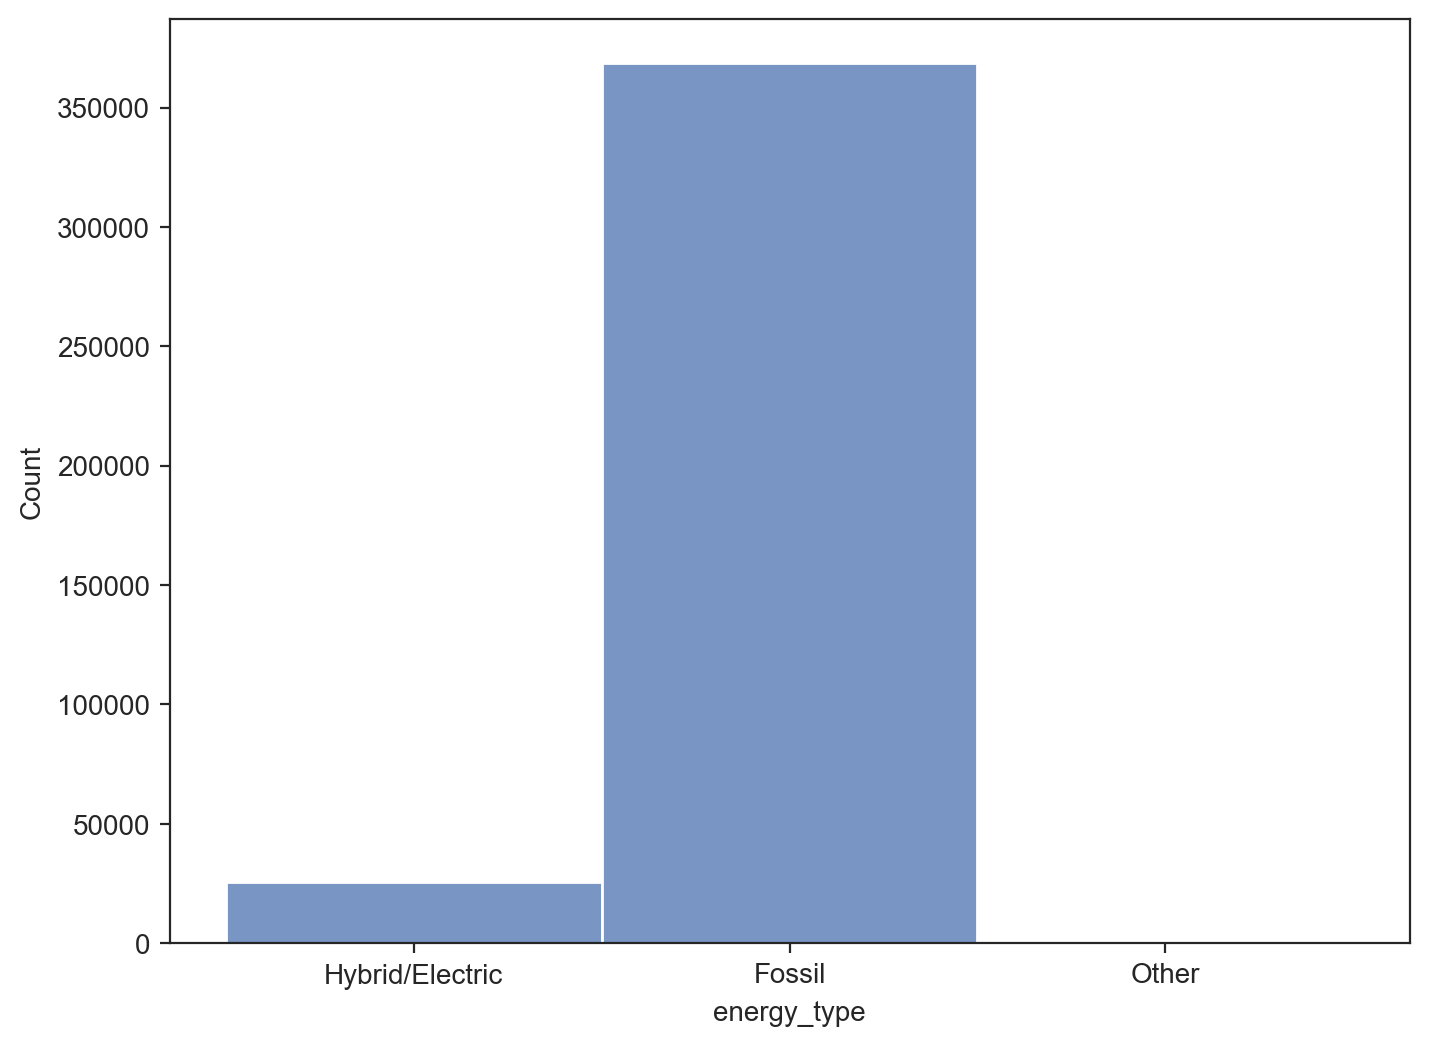

In [81]:
# Plotting energy type to see the comparison
sns.histplot(ads['energy_type'])

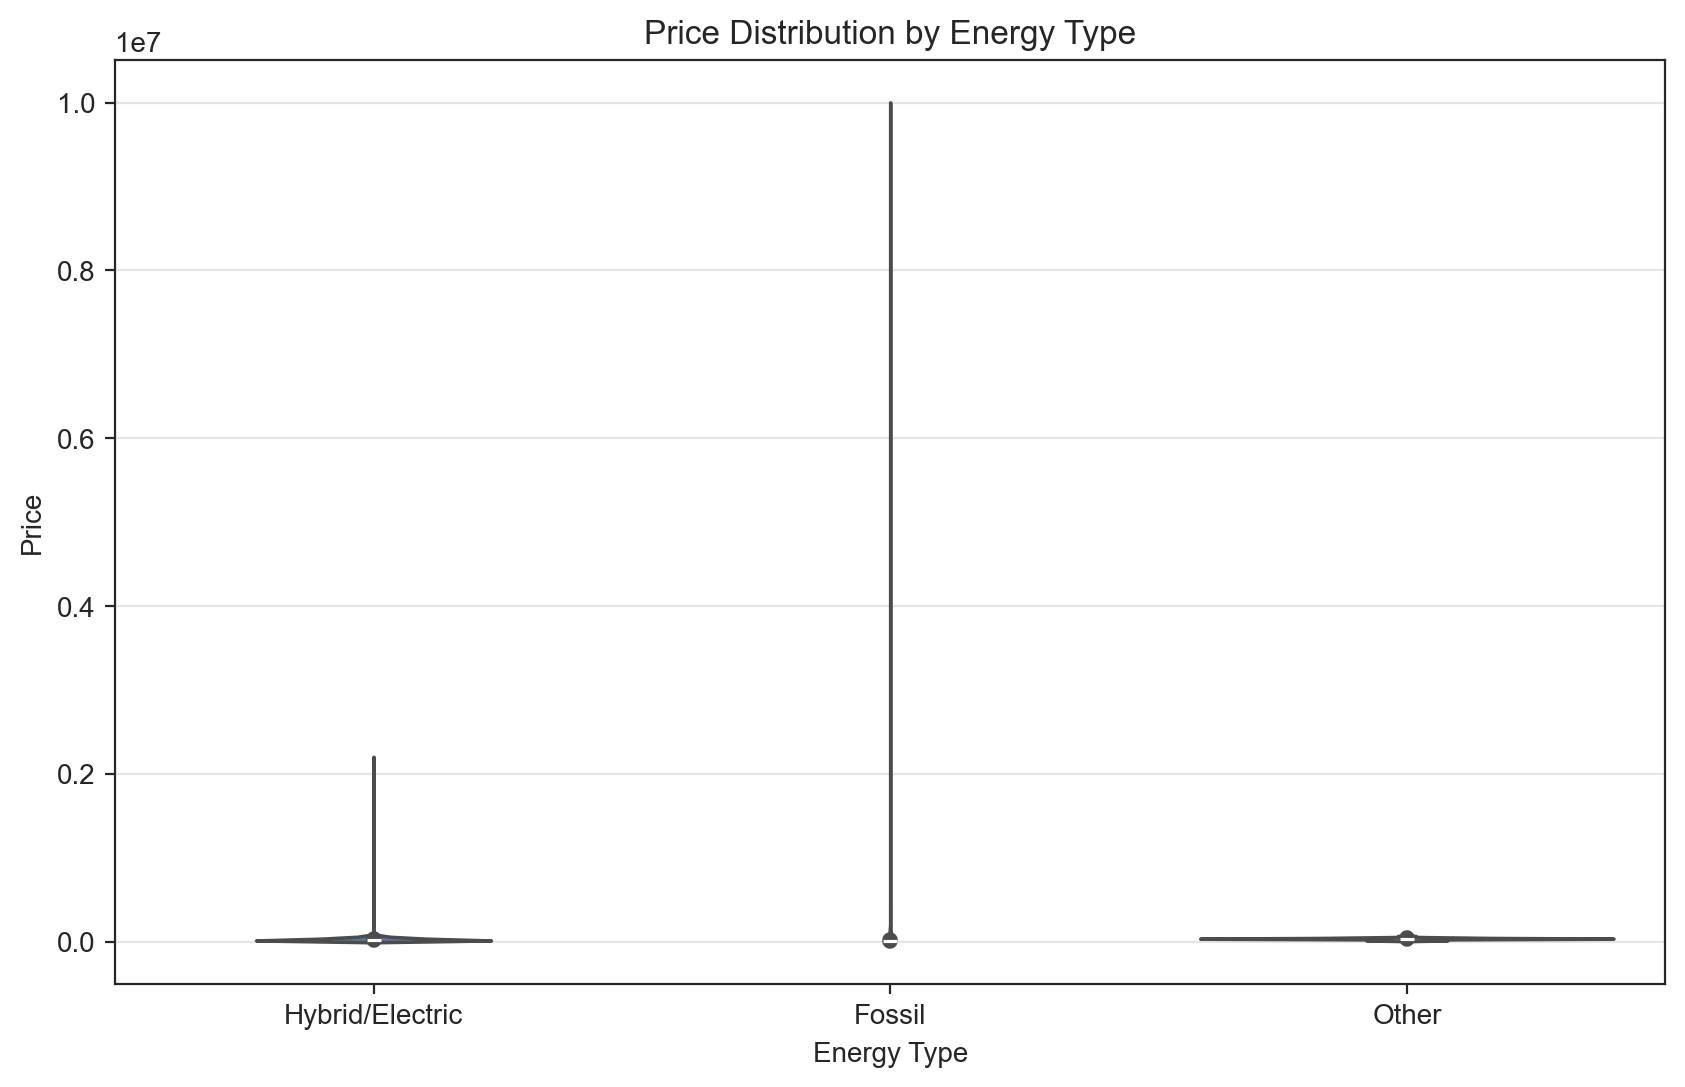

In [84]:
# Plotting price by their energy_type using violin plots

plt.figure(figsize=(10,6))
sns.violinplot(x='energy_type', y='price', data=ads)

# Setting lable and the axis
plt.title('Price Distribution by Energy Type')
plt.xlabel('Energy Type')
plt.ylabel('Price')
plt.grid(axis='y', alpha=0.5)
plt.show()